# LÓGICA DIFUSA CON PYTHON

Importación de las librerías a utilizar

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Definición de las variables de entrada y salida (antecedentes y consecuentes, respectivamente).

In [2]:
# Se definen las variables de entrada (antecedentes) y la variable de salida (consecuente)
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')
propina = ctrl.Consequent(np.arange(0, 21, 1), 'propina')

Se definen las funciones de membresía para las variables de entrada (antecedentes). Estas determinan cómo cada punto en el universo de discurso pertenece a cada conjunto difuso. 

Como puede verse a continuación, se emplean las funciones de membresía del tipo triangular.

La función de membresía triangular está definida por tres parámetros: [a, b, c], donde:
 - a es el punto donde la membresía comienza a aumentar (la base izquierda del triángulo).
 - b es el punto donde la membresía es máxima (la cima del triángulo).
 - c es el punto donde la membresía comienza a disminuir (la base derecha del triángulo).

- `Variable de entrada: Comida`

In [3]:
comida['pobre'] = fuzz.trimf(comida.universe, [0, 2, 5]) 
comida['aceptable'] = fuzz.trimf(comida.universe, [4, 6, 8])
comida['deliciosa'] = fuzz.trimf(comida.universe, [7, 10, 10])

C:\Users\p_san\anaconda3\envs\logica_difusa\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


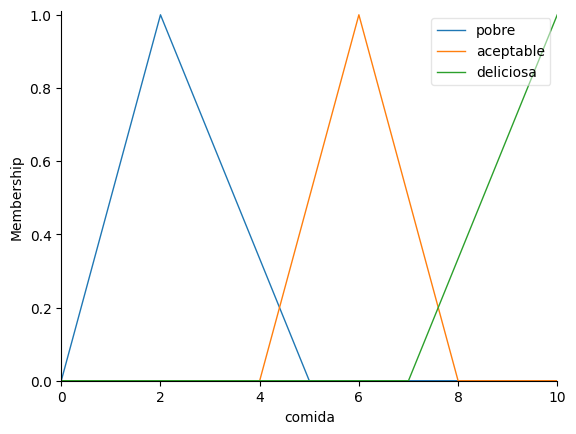

In [4]:
comida.view()
plt.show()

**Comida pobre:**
- Forma: Triangular, con puntos (0, 2, 5).
- Interpretación:
    - 0: La comida tiene una calidad muy pobre, con un grado de pertenencia de 0.
    - 2.5: Punto medio, donde la comida tiene una calidad intermedia entre pobre y aceptable. Aquí, la membresía es de 1 para la comida pobre.
    - 5: La comida tiene una calidad pobre, pero con un grado de pertenencia de 0, indicando el final del intervalo de "pobre".
    - Transición: La membresía decrece linealmente desde 2 hasta 5.

**Comida aceptable:**
- Forma: Triangular, con puntos (4, 6, 8).
- Interpretación:
    - 4: La comida es menos que aceptable, con grado de pertenencia 0 en este punto.
    - 6: La calidad de la comida es medianamente aceptable, con un grado de pertenencia máximo de 1.
    - 8: La comida es más aceptable y se aproxima a "deliciosa", pero con un grado de pertenencia próximo a 0.
    - Transición: La membresía crece linealmente desde 4 a 6 y decrece linealmente desde 6 a 8.

**Comida deliciosa:**
- Forma: Triangular, con puntos (7, 10, 10).
- Interpretación:
    - 7: La comida comienza a ser considerada deliciosa, con un grado de pertenencia de 0.
    - 10: La comida es moderadamente deliciosa, con un grado de pertenencia máximo de 1.
    - 10: La comida tiene la máxima calidad, considerada completamente deliciosa, con un grado de pertenencia de 1.
    - Transición: La membresía crece linealmente desde 7hasta 10.

- `Variable de entrada: Servicio`

In [5]:
servicio['malo'] = fuzz.trimf(servicio.universe, [0, 2, 4])
servicio['normal'] = fuzz.trimf(servicio.universe, [4, 6, 8])
servicio['agradable'] = fuzz.trimf(servicio.universe, [7.5, 10, 10])

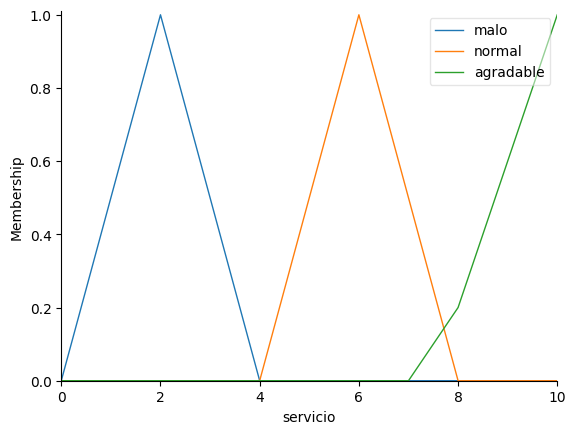

In [6]:
servicio.view()
plt.show()

- `Variable de salida: Propina`

In [7]:
propina['baja'] = fuzz.trimf(propina.universe, [0, 3, 5])
propina['media'] = fuzz.trimf(propina.universe, [5, 10, 15])
propina['alta'] = fuzz.trimf(propina.universe, [15, 20, 20])

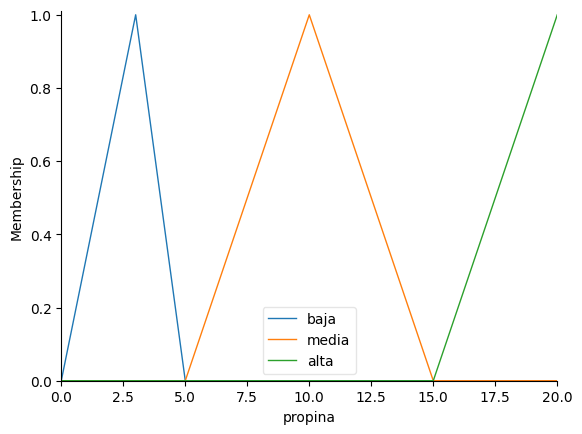

In [8]:
propina.view()
plt.show()

**Propina baja:**

- La membresía es máxima (1) en el punto 3.
- La membresía disminuye linealmente hasta 0 en el punto 5.

**Propina media:**
- La membresía aumenta linealmente desde 0 en el punto 5 hasta 1 en el punto 10.
- La membresía disminuye linealmente desde 1 en el punto 10 hasta 0 en el punto 15.

**Propina alta:**
- La membresía aumenta linealmente desde 0 en el punto 15 hasta 1 en el punto 20.
- La membresía se mantiene en 1 hasta el punto 20.

Una vez explicadas las funciones de membresía de los antecedentes y del consecuente se define el Sistema de Reglas y Sistema de Control

In [9]:
# Reglas 
regla1 = ctrl.Rule(comida['pobre'] | servicio['malo'], propina['baja'])
regla2 = ctrl.Rule(servicio['normal'], propina['media'])
regla3 = ctrl.Rule(comida['deliciosa'] | servicio['agradable'], propina['alta'])

# Sistema de control
union_reglas = [regla1, regla2, regla3]
control_reglas = ctrl.ControlSystem(union_reglas)
sc_propina = ctrl.ControlSystemSimulation(control_reglas)

Tras ello, podemos plantear un ejemplo de uso.

Supongamos que hemos ido a comer en pareja y evaluamos la cantidad de propina a dejar a la camarera que nos ha atendido. Así, consideramos la siguiente puntuación:
- Comida: 6
- Servicio: 8.5

In [10]:
# Datos inputs - puntuaciones sobre la calidad de la comida y del servicio
sc_propina.input['comida'] = 6
sc_propina.input['servicio'] = 8.5

sc_propina.compute()  # ejecución del sistema de control

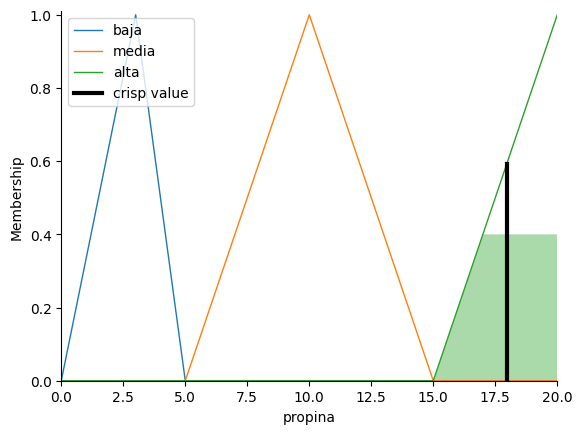

In [11]:
# Resultado final (representación gráfica y solución numérica)
# Gráfico explicativo
propina.view(sim=sc_propina)
plt.legend(loc='upper left')
plt.show()

In [13]:
# Resultado numérico
cantidad = sc_propina.output['propina']  
print('Cantidad de propina:', round(cantidad, 2))

Cantidad de propina: 17.96
